<a href="https://colab.research.google.com/github/dusanpython66/Hello-World-HK/blob/master/Kopie_se%C5%A1itu_Projekt_perceptron_Pleskotov%C3%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model perceptronu

Perceptron je jednotka neuronové sítě (umělý neuron), která provádí určité výpočty k detekci funkcí ve vstupních datech.
Je to algoritmus používaný pro supervizované učení binárních klasifikátorů . Binární klasifikátory rozhodují o tom, zda vstup patří do konkrétní třídy.

Perceptron se skládá ze čtyř hlavních částí - vstupních hodnot, vah, součtu a aktivační funkce.

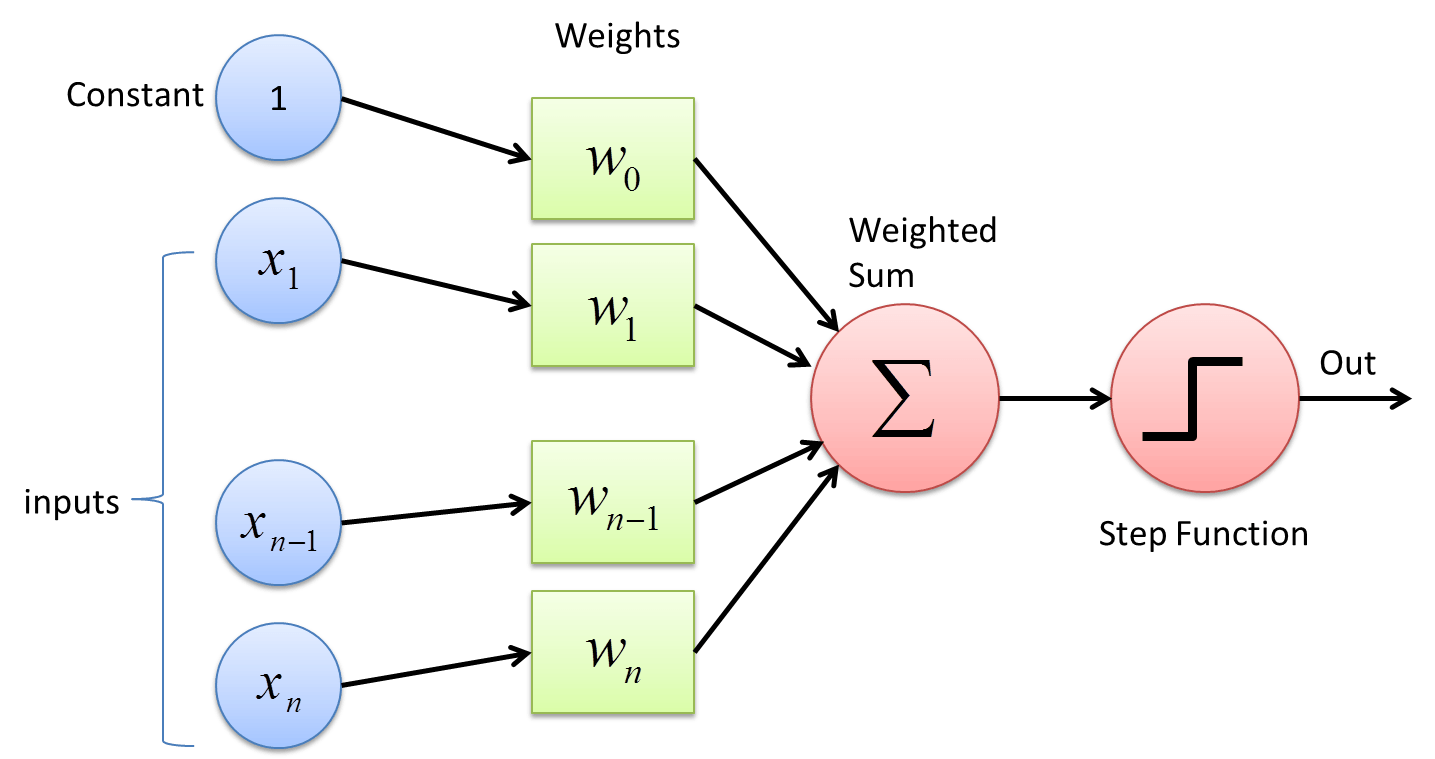

Jak perceptron funfuje? 

Proces začíná převzetím všech vstupních hodnot a vynásobením jejich váhami. Poté se všechny tyto vynásobené hodnoty sečtou a vytvoří vážený součet. Vážený součet se poté aplikuje na aktivační funkci a produkuje výstup perceptronu. Aktivační funkce hraje nedílnou roli při zajišťování mapování výstupu mezi požadovanými hodnotami, jako je (0,1) nebo (-1,1). Je důležité si uvědomit, že váha vstupu indikuje sílu uzlu. Podobně hodnota předpětí vstupu dává možnost posunout křivku aktivační funkce nahoru nebo dolů.

# Perceptron v Pythonu

## Počáteční nastavení 

In [ ]:
################## Hlavička ##################
from math import *
import sympy as sym 
from sympy.plotting import plot3d
from IPython.display import Math, display, Latex
import numpy as np
sym.init_printing()
##############################################

<IPython.core.display.Math object>

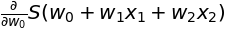

In [ ]:
################## Nastavení symbolů, hodnot a funkce: ##################
from sympy import Derivative, Function, derive_by_array, latex, Lambda, symbols, summation, Sum, oo

S = Function("S")
w0, w1, w2, x1, x2, z = sym.symbols("w0 w1 w2 x1 x2 z")
j = symbols("j", integer=True)
z = w1 * x1 + w2 * x2 + w0
y = S(z)
display(Math(r"""y = %s""" %(sym.latex(y))))
display(Derivative(y, w0, evaluate=False))

## Aktivační funkce $\sigma$

Aktivační funkce se používá k mapování vstupu mezi požadovanými hodnotami, jako je (0, 1) nebo (-1, 1) .

<IPython.core.display.Math object>

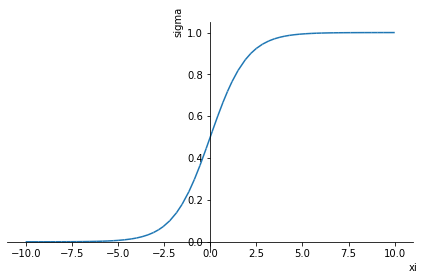

In [ ]:
################## Definice aktivační funkce: ##################
xi, x1, x2, theta, xi = sym.symbols("xi x1 x2 theta xi")
sigma = 1/(1 + sym.exp(-xi))
display(Math(r"""\sigma(\xi) = %s""" %(sym.latex(sigma))))
sym.plot(sigma, (xi, -10, 10), ylabel="sigma")

## Lineární separace ve 2D

Algoritmus pro případ 3 bodů v prostoru $\mathbb R^2.$
Uvažujte dvě množiny bodů a separační hranicí bude rovina o rovnici:
\begin{equation}
w_2x_2 + w_1x_1 + w_0 = 0.
\end{equation}

### 2D algoritmus

In [ ]:
################## generujme  body: ##################
POCET_BODU = 3
DIMENZE = 2
from random import randint
seznam_bodu = []
for i in range(POCET_BODU):
    souradnice = []
    for j in range(DIMENZE):
        x = randint(-10, 10)
        souradnice.append(x)
    seznam_bodu.append((*souradnice,))

print(f"Seznam bodů: {seznam_bodu}")
print()
print("Rodělme body do dvou skupin s příznakem 0 resp. 1.\n \
     Příznak d je čtvrtou souřadnicí.")


################## rozdělení bodu do dvou tříd: #####################
# modrá znamená, že čtvrtá souřadnice je rovna nule
# červená znamená, že čtvrtá souřadnice je rovna jedné
for souradnice in seznam_bodu:
    ind = seznam_bodu.index(souradnice)
    if ind <= len(seznam_bodu) // 2:
        seznam_bodu[ind] = souradnice + (0,)
    else:
        seznam_bodu[ind] = souradnice + (1,)
print(seznam_bodu)
print("-"*80)

################## počáteční nastavení vah: ##################
from math import exp
w1 = 0; w2 = 0; w0 = 1

#seznam_bodu = [(0, 0, 0), (1, 1, 0), (1, 0, 1), (0, 1, 1)]
# nastavení hyperparametru r (anglicky: learning rate)
r = 1  # learning rate
s = len(seznam_bodu)  # počet bodů
epsilon = 0.1
chyba = epsilon 
pocet_opak = 0
while chyba >= epsilon and pocet_opak < 10:
    suma_chyb = 0
    for souradnice in seznam_bodu:
        x1 = souradnice[0]; x2 = souradnice[1];
        z = w1 * x1 + w2 * x2 + w0
        #y = f.subs({xi:z})
        y = 1/(1 + exp(-z)) 
        d = souradnice[DIMENZE]
        #print(y.evalf())
        suma_chyb += abs(d - y)
        w1 = w1 + r * (d - y) * x1
        w2 = w2 + r * (d - y) * x2 
        w0 = w0 + r * (d - y) 
        print(f"w1 = {w1}, w2 = {w2}, w0 = {w0}")
    chyba = (1/s) * suma_chyb # chyba závisí na volbě parametrů w0, w1, w2
    print(f"chyba = {chyba}")
    print()
    pocet_opak += 1
    #print(chyba)
print("-"*50)
print("Algoritmus končí !")
print(f"w1 = {w1}, w2 = {w2}, w0 = {w0}")

Seznam bodů: [(-6, -10), (10, 0), (4, 7)]

Rodělme body do dvou skupin s příznakem 0 resp. 1.
      Příznak d je čtvrtou souřadnicí.
[(-6, -10, 0), (10, 0, 0), (4, 7, 1)]
--------------------------------------------------------------------------------
w1 = 4.38635147178003, w2 = 7.310585786300049, w0 = 0.2689414213699951
w1 = -5.61364852821997, w2 = 7.310585786300049, w0 = -0.7310585786300049
w1 = -5.613648528217173, w2 = 7.310585786304944, w0 = -0.7310585786293055
chyba = 0.5770195262102347

w1 = -5.613648528217173, w2 = 7.310585786304944, w0 = -0.7310585786293055
w1 = -5.613648528217173, w2 = 7.310585786304944, w0 = -0.7310585786293055
w1 = -5.613648528214375, w2 = 7.31058578630984, w0 = -0.731058578628606
chyba = 2.331480479257214e-13

--------------------------------------------------
Algoritmus končí !
w1 = -5.613648528214375, w2 = 7.31058578630984, w0 = -0.731058578628606


### 2D znázornění

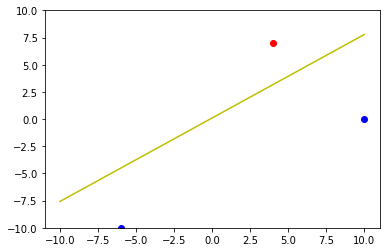

In [ ]:
################## hlavicka kodu: ##################
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

################## predpisy parametru t,s: ##################
t = np.arange(-10.0, 10.0, 0.01)
s = -(w0 + w1 * t) / w2

################## barevne rozdeleni bodu: ##################
seznam_modrych_bodu = []
seznam_cervenych_bodu = []
for bod in seznam_bodu:
    if bod[DIMENZE] == 0:
        seznam_modrych_bodu.append(bod)
    else:
        seznam_cervenych_bodu.append(bod)

################## vykresleni grafu: ##################
plt.plot([bod[0] for bod in seznam_modrych_bodu], 
         [bod[1] for bod in seznam_modrych_bodu], "bo")
plt.plot([bod[0] for bod in seznam_cervenych_bodu], 
         [bod[1] for bod in seznam_cervenych_bodu], "ro")

plt.plot(t, s, "y")
plt.ylim(-10,10)
plt.show()

## Lineární separace ve 3D

Předchozí algoritmus modifukujeme pro případ 3 bodů v prostoru $\mathbb R^3.$
Opět uvažujte dvě množiny bodů. Separační hranicí bude rovina o rovnici:
\begin{equation}
w_3x_3 + w_2x_2 + w_1x_1 + w_0 = 0.
\end{equation}



### 3D algoritmus

In [ ]:
################## generujme  body: ##################
POCET_BODU = 3
DIMENZE = 3
from random import randint
seznam_bodu = []
for i in range(POCET_BODU):
    souradnice = []
    for j in range(DIMENZE):
        x = randint(-10, 10)
        souradnice.append(x)
    seznam_bodu.append((*souradnice,))

print(f"Seznam bodů: {seznam_bodu}")
print()
print("Rodělme body do dvou skupin s příznakem 0 resp. 1.\n \
     Příznak d je čtvrtou souřadnicí.")


################## rozděleni bodu do dvou tříd: #####################
# modrá znamená, že čtvrtá souřadnice je rovna nule
# červená znamená, že čtvrtá souřadnice je rovna jedné
for souradnice in seznam_bodu:
    ind = seznam_bodu.index(souradnice)
    if ind <= len(seznam_bodu) // 2:
        seznam_bodu[ind] = souradnice + (0,)
    else:
        seznam_bodu[ind] = souradnice + (1,)
print(seznam_bodu)
print("-"*80)

################## počáteční nastavení vah: ##################
from math import exp
w1 = 0; w2 = 0; w0 = 1; w3 = 0;

#seznam_bodu = [(0, 0, 0), (1, 1, 0), (1, 0, 1), (0, 1, 1)]
# nastavení hyperparametru r (anglicky: learning rate)
r = 1  # learning rate
s = len(seznam_bodu)  # počet bodů
epsilon = 0.1
chyba = epsilon 
pocet_opak = 0
while chyba >= epsilon and pocet_opak < 10:
    suma_chyb = 0
    for souradnice in seznam_bodu:
        x1 = souradnice[0]; x2 = souradnice[1]; x3 = souradnice[2]
        z = w1 * x1 + w2 * x2 + w3 * x3 + w0
        #y = f.subs({xi:z})
        y = 1/(1 + exp(-z)) 
        d = souradnice[DIMENZE]
        #print(y.evalf())
        suma_chyb += abs(d - y)
        w1 = w1 + r * (d - y) * x1
        w2 = w2 + r * (d - y) * x2
        w3 = w3 + r * (d - y) * x3
        w0 = w0 + r * (d - y) 
        print(f"w1 = {w1}, w2 = {w2}, w3 = {w3}, w0 = {w0}")
    chyba = (1/s) * suma_chyb # chyba závisí na volbě parametrů w0, w1, w2,w3
    print(f"chyba = {chyba}")
    print()
    pocet_opak += 1
    #print(chyba)
print("-"*50)
print("Algoritmus končí !")
print(f"w1 = {w1}, w2 = {w2}, w3 = {w3}, w0 = {w0}")

Seznam bodů: [(9, 6, -10), (6, 10, 9), (-9, -4, -3)]

Rodělme body do dvou skupin s příznakem 0 resp. 1.
      Příznak d je čtvrtou souřadnicí.
[(9, 6, -10, 0), (6, 10, 9, 0), (-9, -4, -3, 1)]
--------------------------------------------------------------------------------
w1 = -6.579527207670044, w2 = -4.38635147178003, w3 = 7.310585786300049, w0 = 0.2689414213699951
w1 = -6.579527396068809, w2 = -4.386351785777972, w3 = 7.3105855037019, w0 = 0.2689413899702009
w1 = -6.579527396068809, w2 = -4.386351785777972, w3 = 7.3105855037019, w0 = 0.2689413899702009
chyba = 0.24368620334326635

w1 = -6.579527396068809, w2 = -4.386351785777972, w3 = 7.3105855037019, w0 = 0.2689413899702009
w1 = -6.579527584466285, w2 = -4.386352099773765, w3 = 7.310585221105686, w0 = 0.2689413585706216
w1 = -6.579527584466285, w2 = -4.386352099773765, w3 = 7.310585221105686, w0 = 0.2689413585706216
chyba = 1.0466526432352397e-08

--------------------------------------------------
Algoritmus končí !
w1 = -6.579527

### 3D znázornění

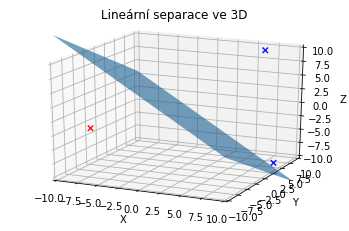

In [ ]:
################## hlavička kodu: ##################
import numpy as np
import matplotlib.pyplot as plt

################## 3D znazorneni: ##################
ax = plt.figure().add_subplot(projection='3d')


################## předpis hodnot x,y,z: ##################
x = np.outer(np.linspace(-10, 10, 2), np.ones(2))
y = x.copy().T 
z =  (w1 * x + w2 * y + w0)/w3
  

################## předpis pro vytvoření grafu: ##################
ax.plot_surface(x, y, z, alpha=0.6)

seznam_x_souradnic = []
seznam_y_souradnic = []
seznam_z_souradnic = []

for souradnice in seznam_bodu:
    seznam_x_souradnic.append(souradnice[0])
    seznam_y_souradnic.append(souradnice[1]) 
    seznam_z_souradnic.append(souradnice[2]) 

xs = np.array([seznam_x_souradnic])
ys = np.array([seznam_y_souradnic])
zs = np.array([seznam_z_souradnic])

ax.scatter(xs, ys, zs, marker="x",  s=30, c=['b', 'b', 'r'], depthshade=False, alpha=0.9)
#s ... zvetsuje a zmensuje velikost bodu
#c ... urcuje barvu bodu,
#depthshade=False ... pokud je hloubkovy stin nastaven na False, pak i body za rovinou jsou zvyrazneny
#alpha ... udava pruhlednost objektu (hodnota od 0 do 1)


################## Hlavní popisek grafu: ##################
ax.set_title("Lineární separace ve 3D") 


################## nastevaneí limit os: ##################
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)


################## nastavení popisků os: ##################
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


################## nastavení otočení grafu: ##################
ax.view_init(elev=20., azim=-65)

plt.show()

## Lineární separace ve 2D pro vzorek 100 hodnot

In [ ]:
################## generujme  body: ##################
POCET_BODU = 100
DIMENZE = 2
from random import randint
seznam_bodu = []
for i in range(POCET_BODU):
    souradnice = []
    for j in range(DIMENZE):
        x = randint(-10, 10)
        souradnice.append(x)
    seznam_bodu.append((*souradnice,))

print(f"Seznam bodů: {seznam_bodu}")
print()
print("Rodělme body do dvou skupin s příznakem 0 resp. 1.\n \
     Příznak d je čtvrtou souřadnicí.")


################## rozdělení bodu do dvou tříd: #####################
# modrá znamená, že čtvrtá souřadnice je rovna nule
# červená znamená, že čtvrtá souřadnice je rovna jedné
for souradnice in seznam_bodu:
    ind = seznam_bodu.index(souradnice)
    if ind <= len(seznam_bodu) // 2:
        seznam_bodu[ind] = souradnice + (0,)
    else:
        seznam_bodu[ind] = souradnice + (1,)
print(seznam_bodu)
print("-"*80)

################## počáteční nastavení vah: ##################
from math import exp
w1 = 0; w2 = 0; w0 = 1

#seznam_bodu = [(0, 0, 0), (1, 1, 0), (1, 0, 1), (0, 1, 1)]
# nastavení hyperparametru r (anglicky: learning rate)
r = 1  # learning rate
s = len(seznam_bodu)  # počet bodů
epsilon = 0.1
chyba = epsilon 
pocet_opak = 0
while chyba >= epsilon and pocet_opak < 10:
    suma_chyb = 0
    for souradnice in seznam_bodu:
        x1 = souradnice[0]; x2 = souradnice[1];
        z = w1 * x1 + w2 * x2 + w0
        #y = f.subs({xi:z})
        y = 1/(1 + exp(-z)) 
        d = souradnice[DIMENZE]
        #print(y.evalf())
        suma_chyb += abs(d - y)
        w1 = w1 + r * (d - y) * x1
        w2 = w2 + r * (d - y) * x2 
        w0 = w0 + r * (d - y) 
        #print(f"w1 = {w1}, w2 = {w2}, w0 = {w0}")
    chyba = (1/s) * suma_chyb # chyba závisí na volbě parametrů w0, w1, w2
    #print(f"chyba = {chyba}")
    #print()
    pocet_opak += 1
    #print(chyba)
#print("-"*50)
print("Algoritmus končí !")
print(f"w1 = {w1}, w2 = {w2}, w0 = {w0}")

Seznam bodů: [(4, 10), (-10, -1), (-7, 8), (5, -10), (8, -10), (-10, 6), (-8, 3), (-4, 8), (10, -3), (-5, 4), (8, -7), (0, -10), (-4, -6), (-4, -7), (-4, 2), (3, -9), (-8, 2), (4, 9), (-3, -10), (-3, -6), (-1, -8), (4, 4), (-9, -10), (-6, 3), (-5, 0), (9, -3), (-4, -9), (-9, -5), (5, -7), (-6, 8), (-10, -7), (0, -2), (4, -10), (-10, 3), (10, -7), (-6, 2), (10, -2), (0, -6), (3, -9), (5, -6), (-2, 9), (8, -6), (-5, 7), (1, 6), (-2, 1), (-4, 5), (-4, -4), (-7, 6), (3, -4), (0, 5), (4, 5), (-3, 9), (4, 7), (-9, 10), (-4, 9), (0, -10), (2, 7), (7, -9), (-5, -10), (3, 7), (-4, -5), (-1, -1), (-3, -4), (-6, 1), (-5, -9), (5, 3), (2, -9), (7, -7), (6, -5), (4, 0), (1, 0), (-5, -9), (-1, 4), (-1, -10), (-5, -1), (1, -2), (2, -8), (-5, 8), (8, 1), (2, 6), (9, 3), (0, -9), (2, 10), (8, 0), (5, 4), (3, -7), (4, -10), (-1, -6), (10, -4), (-10, -6), (3, -10), (-7, -6), (10, 6), (10, 7), (3, 5), (-8, -3), (-10, -9), (-9, 10), (-3, 3), (10, 7)]

Rodělme body do dvou skupin s příznakem 0 resp. 1.
    

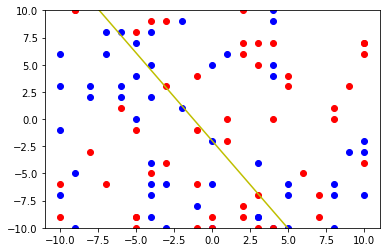

In [ ]:
################## hlavicka kodu: ##################
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

################## predpisy parametru t,s: ##################
t = np.arange(-10.0, 10.0, 0.01)
s = -(w0 + w1 * t) / w2

################## barevne rozdeleni bodu: ##################
seznam_modrych_bodu = []
seznam_cervenych_bodu = []
for bod in seznam_bodu:
    if bod[DIMENZE] == 0:
        seznam_modrych_bodu.append(bod)
    else:
        seznam_cervenych_bodu.append(bod)

################## vykresleni grafu: ##################
plt.plot([bod[0] for bod in seznam_modrych_bodu], 
         [bod[1] for bod in seznam_modrych_bodu], "bo")
plt.plot([bod[0] for bod in seznam_cervenych_bodu], 
         [bod[1] for bod in seznam_cervenych_bodu], "ro")

plt.plot(t, s, "y")
plt.ylim(-10,10)
plt.show()